In [36]:
# Import Library
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# to ingnore the warnings 
import warnings                          
warnings.filterwarnings('ignore')

# Regression Analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Support Vector Machine
from sklearn.svm import SVC

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
house_data = pd.read_csv(r"C:\Users\tinot\OneDrive\Documents\My Python Repository\Pandas\kc_house_data.csv")
house_data
 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data Preprocessing

In [3]:
# Null values
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#prints total number of missing values in each column
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Duplicate values
house_data.duplicated().sum()

0

# Dimensionality Reduction

In [6]:
# Dimensionality Reduction of dimensions that are not informative for my specific analysis and can be excluded.
house_data = house_data.drop(['id', 'date', 'zipcode', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis=1)

# Exploratory Data Analysis

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 2.5 MB


In [8]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000


In [9]:
house_data.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
lat              5034
long              752
dtype: int64

In [10]:
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,47.5345,-122.069


# Splitting Dataset

In [44]:
# Splitting Data into Training and Testing Sets
X = house_data.drop('price', axis=1)
y = house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Linear Regression Analysis

In [45]:
# Creating a Linear Regression model and fitting it to the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [46]:
# Using the model to make predictions on the testing data
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [47]:
# Evaluate the performance of the model using Mean Squared Error and R-squared metrics:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# In this case, the MSE is very large, which indicates that the model is not making very accurate predictions. 
# A lower MSE value would be better, as it would mean the model is making predictions closer to the actual values.
# R-squared value suggests that the model is able to explain about 65% of the variability in the property prices based on the given features.

Mean Squared Error:  45166133119.79333
R-squared:  0.6980623676226092


In [48]:
reg_acc_train = r2_score(y_train , y_pred_train)
reg_acc_test = r2_score(y_test , y_pred)

print("Training Accuracy:", round(reg_acc_train, 4))
print("Test Accuracy:", round(reg_acc_test, 4))

Training Accuracy: 0.6918
Test Accuracy: 0.6981


In [49]:
# Define a function to take user input and make a prediction
def predict_house_price():
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    sqft_living = int(input("Enter the square footage of the living area: "))
    sqft_lot = int(input("Enter the square footage of the lot: "))
    floors = float(input("Enter the number of floors: "))
    waterfront = int(input("Is the house on the waterfront? (0=no, 1=yes): "))
    view = int(input("What is the view rating? (0-4): "))
    condition = int(input("What is the Condition? (0-4): "))
    grade = int(input("What is the grade of the house? (1-13): "))
    sqft_above = int(input("Enter the square footage of the area above ground: "))
    sqft_basement = int(input("Enter the square footage of the basement: "))
    yr_built = int(input("Enter the year the house was built: "))
    lat = float(input("Enter the latitude: "))
    long = float(input("Enter the longitude: "))

    # Create a dataframe with the user input
    user_input = pd.DataFrame({
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'sqft_living': [sqft_living],
        'sqft_lot': [sqft_lot],
        'floors': [floors],
        'waterfront': [waterfront],
        'view': [view],
        'condition': [condition],
        'grade': [grade],
        'sqft_above': [sqft_above],
        'sqft_basement': [sqft_basement],
        'yr_built': [yr_built],
        'lat': [lat],
        'long': [long],
    })

    # Make a prediction
    prediction = reg.predict(user_input)

    print("The predicted price of the house is: ${:.2f}".format(prediction[0]))

In [67]:
# Call the function to take user input and make a prediction
predict_house_price()

Enter the number of bedrooms:  4
Enter the number of bathrooms:  2.5
Enter the square footage of the living area:  4120
Enter the square footage of the lot:  14866
Enter the number of floors:  1
Is the house on the waterfront? (0=no, 1=yes):  1
What is the view rating? (0-4):  4
What is the Condition? (0-4):  3
What is the grade of the house? (1-13):  8
Enter the square footage of the area above ground:  2070
Enter the square footage of the basement:  2050
Enter the year the house was built:  1965
Enter the latitude:  47.5571
Enter the longitude:  -122.193


The predicted price of the house is: $1651743.24


# Decision Tree Based Model

In [51]:
#   the Decision Tree Model Now we're ready to build our decision tree model.
# We'll use the DecisionTreeRegressor class from the scikit-learn library.

# Build the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
# Model Evaluation
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 43042567223.51
R-squared: 0.71


In [53]:
reg_acc_train = r2_score(y_train , y_pred_train)
reg_acc_test = r2_score(y_test , y_pred)

print("Training Accuracy:", round(reg_acc_train, 4))
print("Test Accuracy:", round(reg_acc_test, 4))

Training Accuracy: 0.9993
Test Accuracy: 0.7123


In [54]:
# Define a function to take user input and make a prediction
def decision_tree_predict_house_price():
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    sqft_living = int(input("Enter the square footage of the living area: "))
    sqft_lot = int(input("Enter the square footage of the lot: "))
    floors = float(input("Enter the number of floors: "))
    waterfront = int(input("Is the house on the waterfront? (0=no, 1=yes): "))
    view = int(input("What is the view rating? (0-4): "))
    condition = int(input("What is the Condition? (0-4): "))
    grade = int(input("What is the grade of the house? (1-13): "))
    sqft_above = int(input("Enter the square footage of the area above ground: "))
    sqft_basement = int(input("Enter the square footage of the basement: "))
    yr_built = int(input("Enter the year the house was built: "))
    lat = float(input("Enter the latitude: "))
    long = float(input("Enter the longitude: "))

    # Create a dataframe with the user input
    user_input = pd.DataFrame({
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'sqft_living': [sqft_living],
        'sqft_lot': [sqft_lot],
        'floors': [floors],
        'waterfront': [waterfront],
        'view': [view],
        'condition': [condition],
        'grade': [grade],
        'sqft_above': [sqft_above],
        'sqft_basement': [sqft_basement],
        'yr_built': [yr_built],
        'lat': [lat],
        'long': [long],
    })

    # Make a prediction
    prediction = model.predict(user_input)

    print("The predicted price of the house is: ${:.2f}".format(prediction[0]))

In [68]:
decision_tree_predict_house_price()

Enter the number of bedrooms:  4
Enter the number of bathrooms:  2.5
Enter the square footage of the living area:  4120
Enter the square footage of the lot:  14866
Enter the number of floors:  1
Is the house on the waterfront? (0=no, 1=yes):  1
What is the view rating? (0-4):  4
What is the Condition? (0-4):  3
What is the grade of the house? (1-13):  8
Enter the square footage of the area above ground:  2070
Enter the square footage of the basement:  2050
Enter the year the house was built:  1965
Enter the latitude:  47.5571
Enter the longitude:  -122.193


The predicted price of the house is: $1851000.00


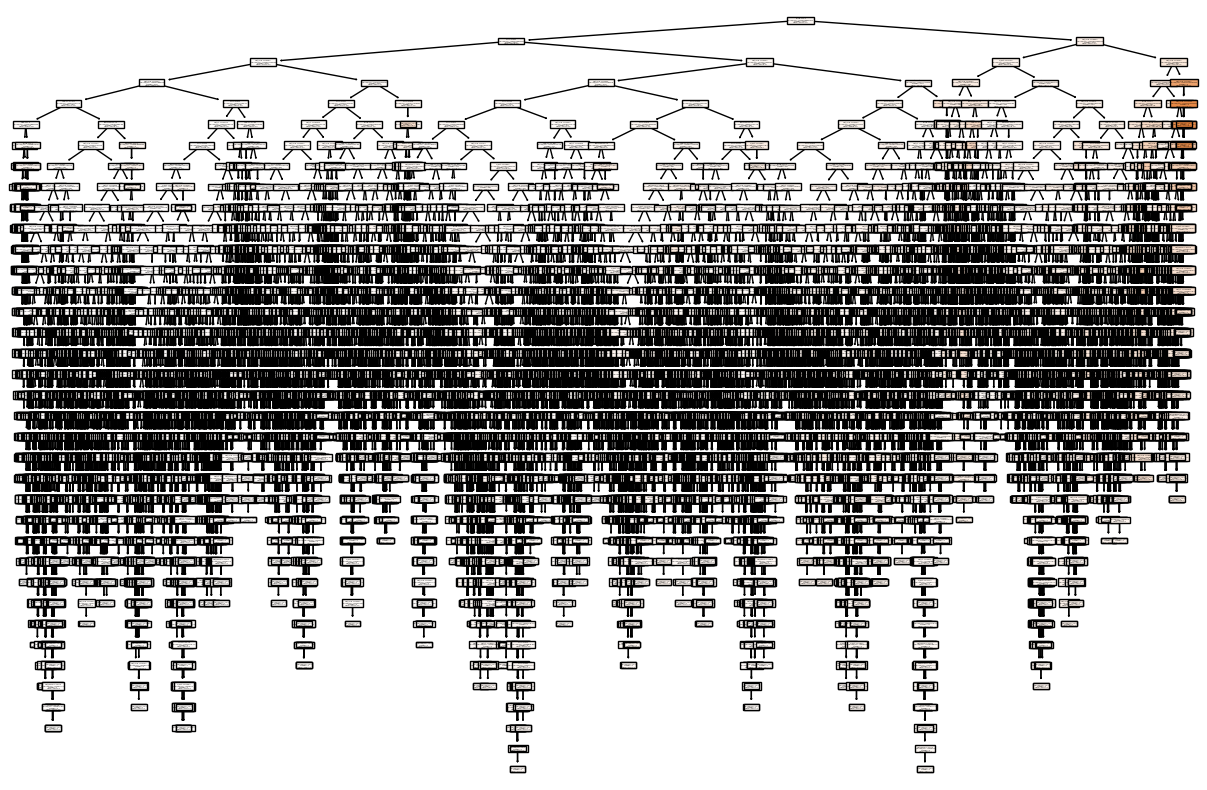

In [18]:
# Visualizing the Decision Tree You can also visualize the decision tree using the plot_tree function 
# from the scikit-learn library. 

# Plot the decision tree
fig = plt.figure(figsize=(15,10))
_ = plot_tree(model, feature_names=X.columns, class_names=['price'], filled=True)

# This will give you a visual representation of how the categorical features influence the price range.


# Random Forest

In [56]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
mse = np.mean(scores)
print(f'Mean Squared Error: {mse}')
r2 = regressor.score(X, y)
print(f'R-squared: {r2}')

Mean Squared Error: -16906878194.64056
R-squared: 0.9495325943294286


In [58]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

reg_acc_train = r2_score(y_train , y_pred_train)
reg_acc_test = r2_score(y_test , y_pred)

print("Training Accuracy:", round(reg_acc_train, 4))
print("Test Accuracy:", round(reg_acc_test, 4))

Training Accuracy: 0.9821
Test Accuracy: 0.8647


In [59]:
# Define a function to take user input and make a prediction
def random_forest_predict_house_price():
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    sqft_living = int(input("Enter the square footage of the living area: "))
    sqft_lot = int(input("Enter the square footage of the lot: "))
    floors = float(input("Enter the number of floors: "))
    waterfront = int(input("Is the house on the waterfront? (0=no, 1=yes): "))
    view = int(input("What is the view rating? (0-4): "))
    condition = int(input("What is the Condition? (0-4): "))
    grade = int(input("What is the grade of the house? (1-13): "))
    sqft_above = int(input("Enter the square footage of the area above ground: "))
    sqft_basement = int(input("Enter the square footage of the basement: "))
    yr_built = int(input("Enter the year the house was built: "))
    lat = float(input("Enter the latitude: "))
    long = float(input("Enter the longitude: "))

    # Create a dataframe with the user input
    user_input = pd.DataFrame({
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'sqft_living': [sqft_living],
        'sqft_lot': [sqft_lot],
        'floors': [floors],
        'waterfront': [waterfront],
        'view': [view],
        'condition': [condition],
        'grade': [grade],
        'sqft_above': [sqft_above],
        'sqft_basement': [sqft_basement],
        'yr_built': [yr_built],
        'lat': [lat],
        'long': [long],
    })

    # Make a prediction
    prediction = regressor.predict(user_input)

    print("The predicted price of the house is: ${:.2f}".format(prediction[0]))

In [69]:
random_forest_predict_house_price()

Enter the number of bedrooms:  4
Enter the number of bathrooms:  2.5
Enter the square footage of the living area:  4120
Enter the square footage of the lot:  14866
Enter the number of floors:  1
Is the house on the waterfront? (0=no, 1=yes):  1
What is the view rating? (0-4):  4
What is the Condition? (0-4):  3
What is the grade of the house? (1-13):  8
Enter the square footage of the area above ground:  2070
Enter the square footage of the basement:  2050
Enter the year the house was built:  1965
Enter the latitude:  47.5571
Enter the longitude:  -122.193


The predicted price of the house is: $1920639.50


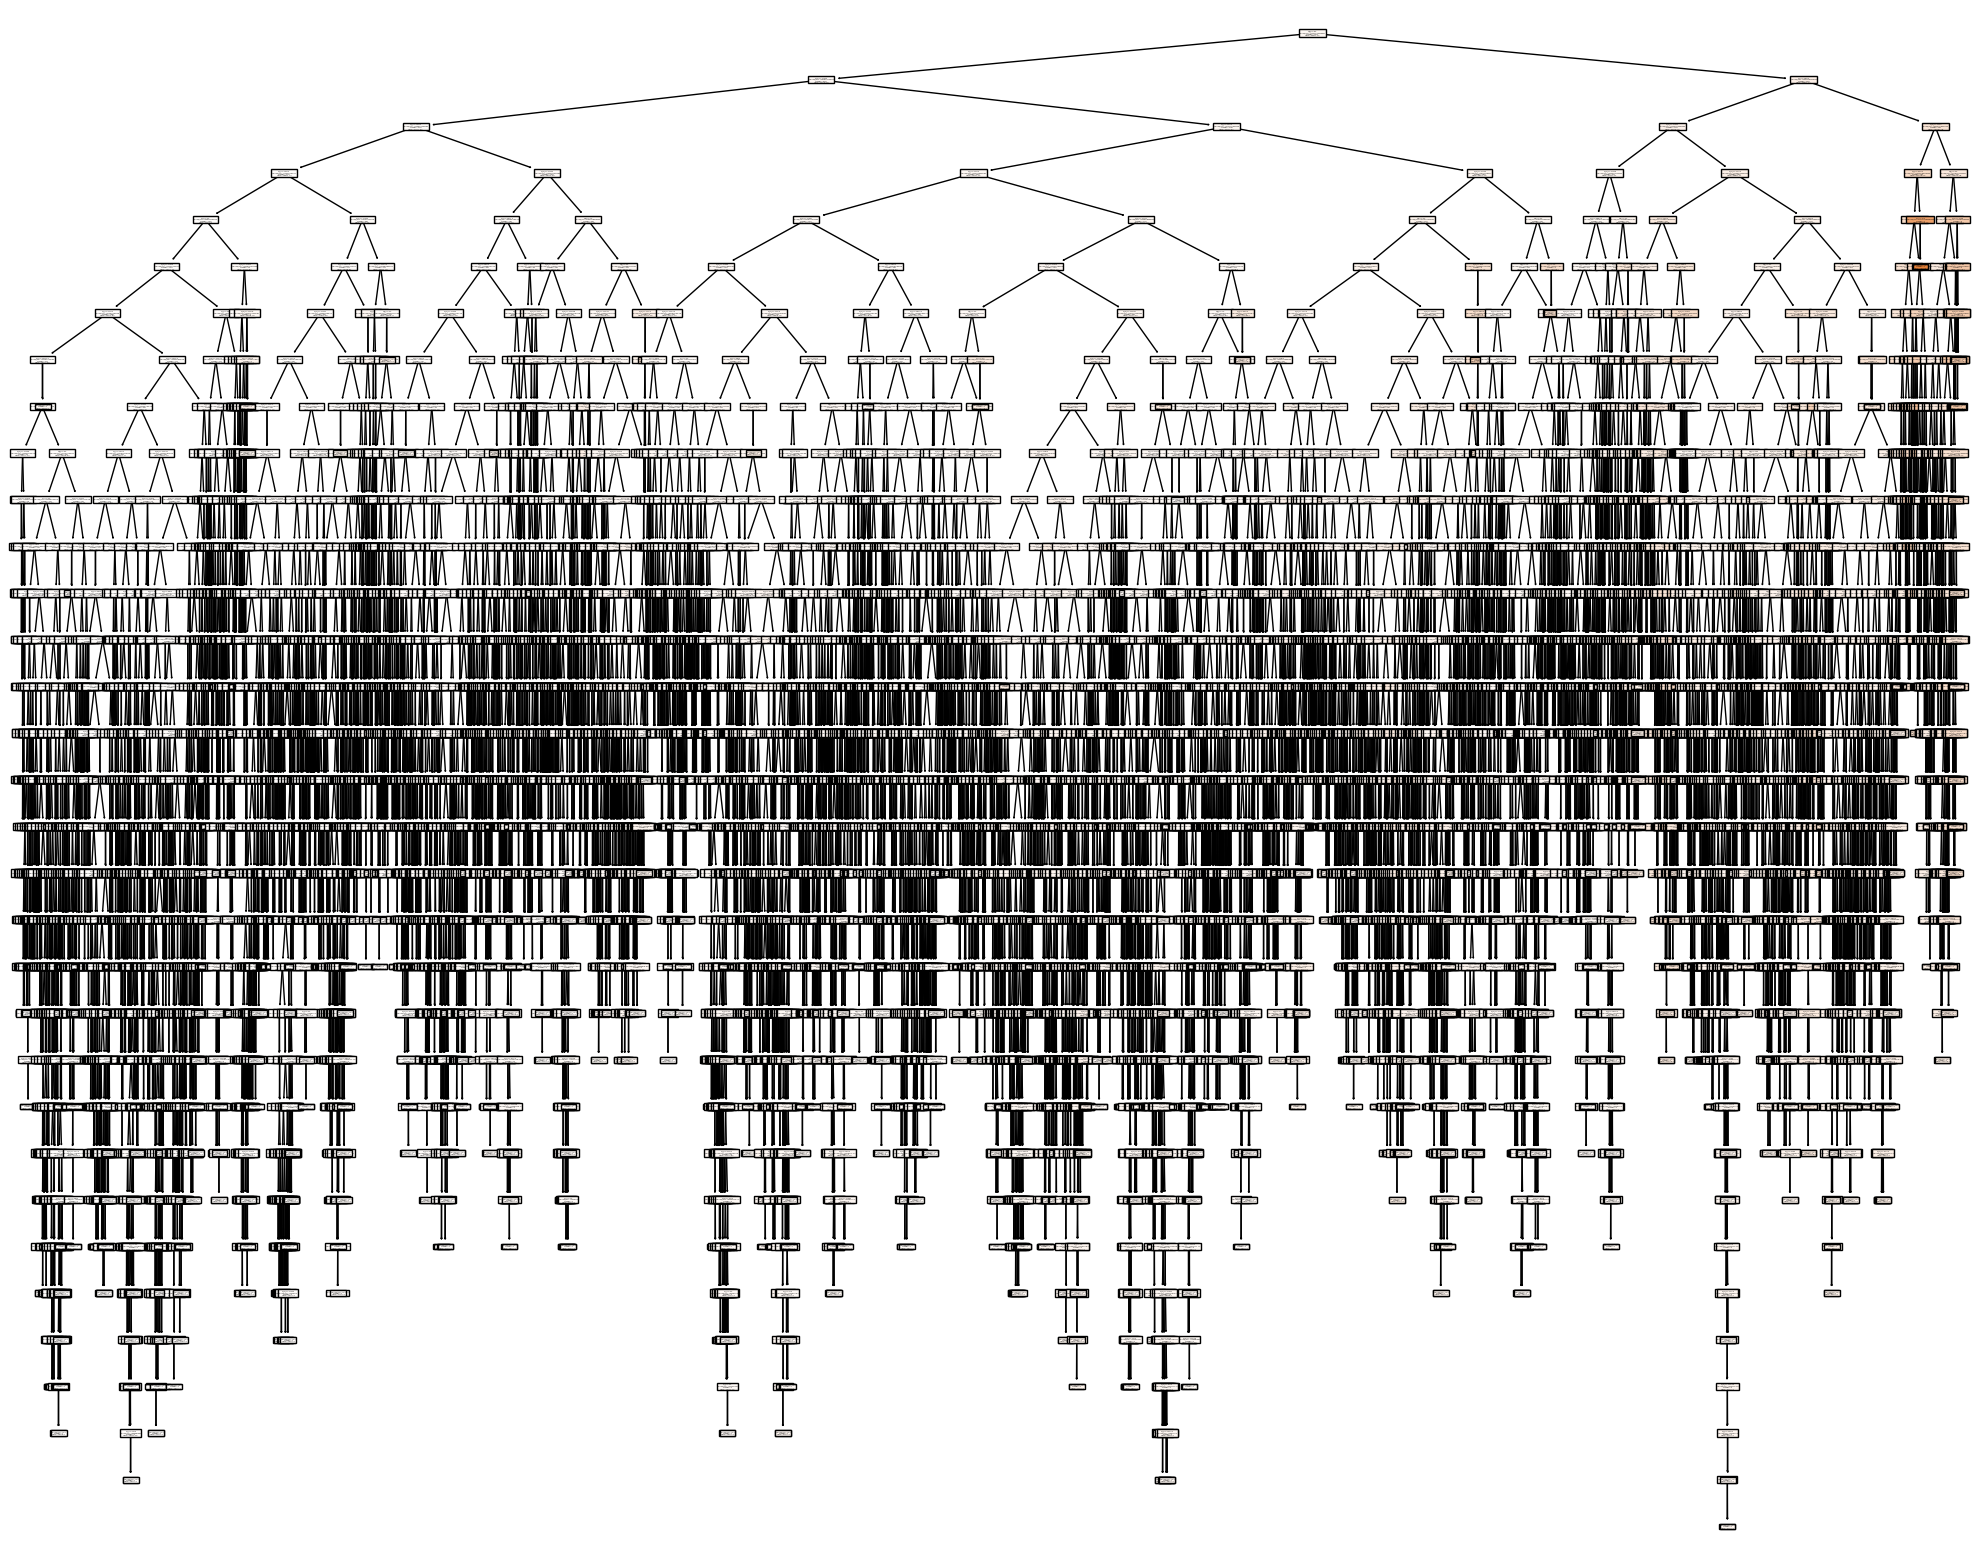

In [37]:
fig = plt.figure(figsize=(25,20))
dot_data = tree.plot_tree(decision_tree=regressor.estimators_[0], filled=True)

# Gaussian Naive Bayes model

In [61]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [62]:
# Use the model to make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate the mean squared error and R-squared score of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the accuracy metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared score: {:.2f}".format(r2))

Mean Squared Error: 89614953200.95
R-squared score: 0.40


In [63]:
y_pred = nb_model.predict(X_test)
y_pred_train = nb_model.predict(X_train)

reg_acc_train = r2_score(y_train , y_pred_train)
reg_acc_test = r2_score(y_test , y_pred)

print("Training Accuracy:", round(reg_acc_train, 4))
print("Test Accuracy:", round(reg_acc_test, 4))

Training Accuracy: 0.5706
Test Accuracy: 0.4009


In [64]:
# Define a function to take user input and make a prediction
def naive_predict_house_price():
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    sqft_living = int(input("Enter the square footage of the living area: "))
    sqft_lot = int(input("Enter the square footage of the lot: "))
    floors = float(input("Enter the number of floors: "))
    waterfront = int(input("Is the house on the waterfront? (0=no, 1=yes): "))
    view = int(input("What is the view rating? (0-4): "))
    condition = int(input("What is the Condition? (0-4): "))
    grade = int(input("What is the grade of the house? (1-13): "))
    sqft_above = int(input("Enter the square footage of the area above ground: "))
    sqft_basement = int(input("Enter the square footage of the basement: "))
    yr_built = int(input("Enter the year the house was built: "))
    lat = float(input("Enter the latitude: "))
    long = float(input("Enter the longitude: "))

    # Create a dataframe with the user input
    user_input = pd.DataFrame({
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'sqft_living': [sqft_living],
        'sqft_lot': [sqft_lot],
        'floors': [floors],
        'waterfront': [waterfront],
        'view': [view],
        'condition': [condition],
        'grade': [grade],
        'sqft_above': [sqft_above],
        'sqft_basement': [sqft_basement],
        'yr_built': [yr_built],
        'lat': [lat],
        'long': [long],
    })

    # Make a prediction
    prediction = nb_model.predict(user_input)

    print("The predicted price of the house is: ${:.2f}".format(prediction[0]))

In [65]:
naive_predict_house_price()

Enter the number of bedrooms:  4
Enter the number of bathrooms:  3.25
Enter the square footage of the living area:  3100
Enter the square footage of the lot:  3900
Enter the number of floors:  2
Is the house on the waterfront? (0=no, 1=yes):  0
What is the view rating? (0-4):  2
What is the Condition? (0-4):  5
What is the grade of the house? (1-13):  9
Enter the square footage of the area above ground:  2090
Enter the square footage of the basement:  1010
Enter the year the house was built:  1923
Enter the latitude:  47.6385
Enter the longitude:  -122.348


The predicted price of the house is: $1265000.00


In [38]:
house_data


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,47.5345,-122.069
